<a href="https://colab.research.google.com/github/Kishorecsmani/ScalerProject/blob/main/EducationCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='33A2FF'><b>Problem Statement
<font color='33A2FF'>1) What factors are important in graduate admissions

<font color='33A2FF'>2) How these factors are interrelated among themselves

<font color='33A2FF'>3)Predict one's chances of admission given the rest of the variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
!gdown 1xyhipO1qgA42oXmlBPUhEr4CKSSU2KrV

In [ ]:
df = pd.read_csv('Admission.csv')
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

<font color='#0dab7f'> Removing the serial no column as it is unique number which does not add value for analysis

In [ ]:
df = df.iloc[:, 1:]

In [ ]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<font color='33A2FF'><b>1.Identification of variables and data types:</b></font>

In [ ]:
#rows ans columns of data
df.shape

(500, 8)

In [ ]:
#checking datatypes
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
# Number of records with No Null value
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<font color='33A2FF'><b>2.Analysing the basic metrics :</b></font>

In [ ]:
# describe on column having integer data type
df.describe(include=[np.number])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.columns = [col.strip().replace(' ', '_') for col in df.columns]
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [ ]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

GRE_Score            0.0
TOEFL_Score          0.0
University_Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance_of_Admit      0.0
dtype: float64

<font color='#0dab7f'>No missing/null values in all the columns Hence Missing value treatment is not required</font>

In [ ]:
df.loc[df.duplicated() == True]  

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit


<font color='#0dab7f'>No rows are duplicated</font>

In [ ]:
#number of unique values in our data
cat_col = []
num_col = []
for i in df.columns:
  print(i, " : ", df[i].nunique())
  if df[i].nunique() > 10:
    num_col.append(i)
  else:
    cat_col.append(i)
print("List of numerical columns : ", num_col)
print("List of categorical columns : ", cat_col)

GRE_Score  :  49
TOEFL_Score  :  29
University_Rating  :  5
SOP  :  9
LOR  :  9
CGPA  :  184
Research  :  2
Chance_of_Admit  :  61
List of numerical columns :  ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']
List of categorical columns :  ['University_Rating', 'SOP', 'LOR', 'Research']


In [ ]:
#Function for Univariate plot for numerical
def univariateNumerical(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure(figsize=(25,5))
  plt.subplot(1,2,1)
  plt.title("HIST PLOT")
  sns.histplot(data = df, x= col, kde=True, color = 'orange' )
  #plt.subplot(1,3,2)
  #plt.title("COUNT PLOT")
  #sns.countplot(data = df, x= col)
  plt.subplot(1,2,2)
  plt.title("BOX PLOT")
  sns.boxplot(x = col, data = df, color = 'green')
  plt.show()


In [ ]:
#Function for Univariate plot for Discrete
def univariateDiscrete(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure()  
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= col)
  plt.xticks(rotation = 90)
  plt.show()

<font color='33A2FF'><b> Outlier Detection 

In [ ]:
# Function to calculate outlier range
def outlier(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  print(" ")
  print('\033[1m'+'\033[95m' +'OUTLIER FOR COLUMN : '+ col )
  print("Outliers:",sum(df[col] > ub) + sum(df[col] < lb))
  print("Lower limit", lb)
  print("Upper limit", ub ,'\033[0m')

In [ ]:
def outlierRemoval(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  df = df[(df[col]>=lb) & (df[col]<=ub)]
  return df

In [ ]:
# List of numerical columns :  ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']
# List of categorical columns :  ['University Rating', 'SOP', 'LOR ', 'Research']

=======GRE_Score===========
Describe Method
count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE_Score, dtype: float64



Value count Method
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
Name: GRE_Score, dtype: int64


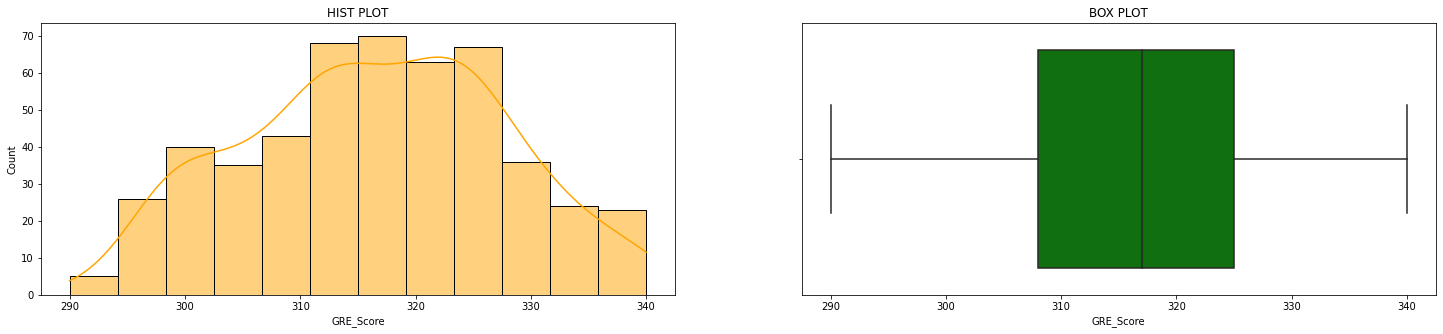

=======TOEFL_Score===========
Describe Method
count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL_Score, dtype: float64



Value count Method
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
Name: TOEFL_Score, dtype: int64


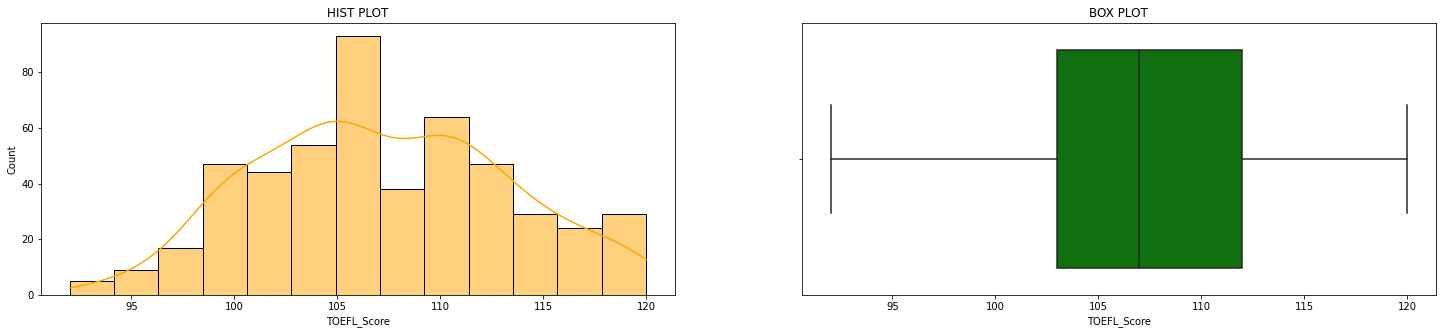

=======CGPA===========
Describe Method
count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64



Value count Method
8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
8.56    7
8.65    6
7.88    6
9.11    6
9.04    6
Name: CGPA, dtype: int64


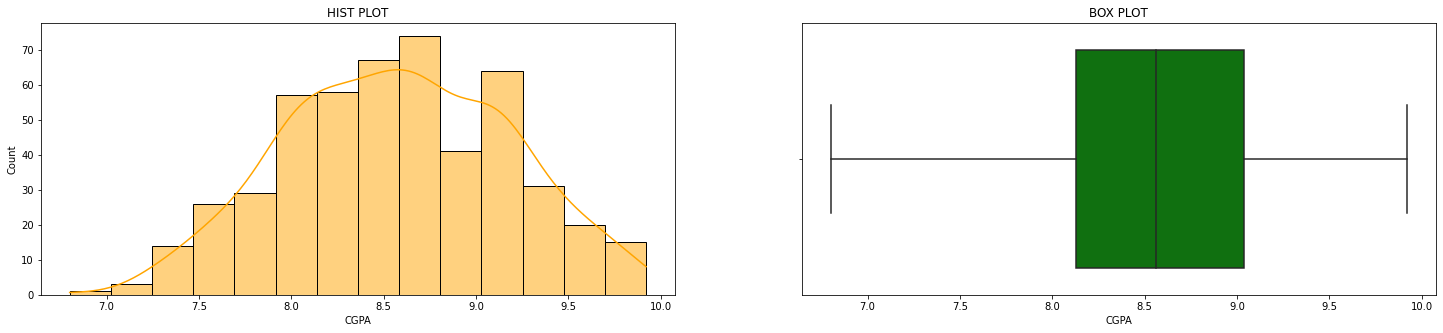

=======Chance_of_Admit===========
Describe Method
count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance_of_Admit, dtype: float64



Value count Method
0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
0.78    15
0.76    14
0.62    13
0.94    13
0.70    13
Name: Chance_of_Admit, dtype: int64


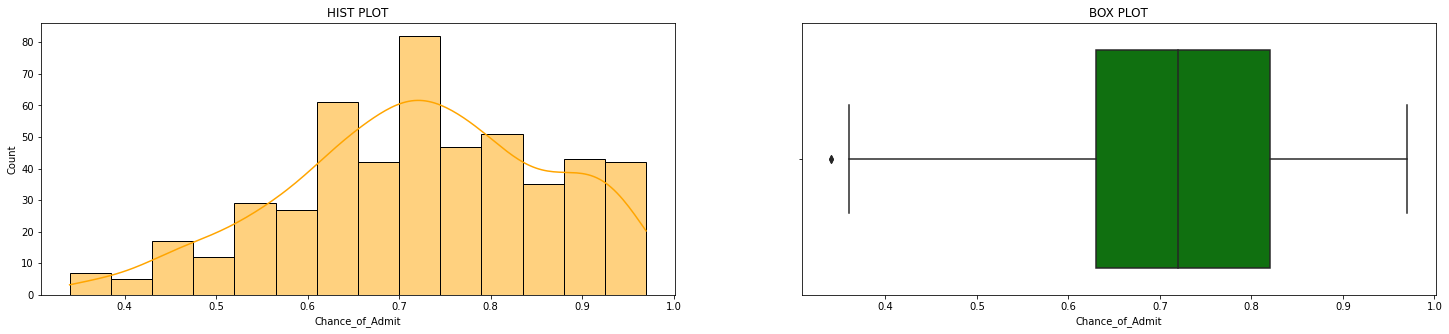

In [ ]:
for i in num_col:
  print(f"======={ i }===========")
  univariateNumerical(df, i)
  

<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'> GRE Score - Median score is 317 out of 340, Most number of students (24) scored 312 and Max score is 340

<font color='#0dab7f'> TOEFL Score -  Median score is 107 out of 120, Most number of students (44) scored 110 and Max score is 120

<font color='#0dab7f'> CGPA - Median score is 8.56 out of 10, Most number of students (9) scored 8.76 and Max score is 9.92

<font color='#0dab7f'> Chance of Admit - Median score is 0.72, Most number of students (23) scored 0.71 and Max score is 0.97

In [ ]:
# Outlier
for i in num_col:
  print(f"======={ i }===========")
  outlier(df, i)

=======GRE_Score===========
 
OUTLIER FOR COLUMN : GRE_Score
Outliers: 0
Lower limit 282.5
Upper limit 350.5 
=======TOEFL_Score===========
 
OUTLIER FOR COLUMN : TOEFL_Score
Outliers: 0
Lower limit 89.5
Upper limit 125.5 
=======CGPA===========
 
OUTLIER FOR COLUMN : CGPA
Outliers: 0
Lower limit 6.7587500000000045
Upper limit 10.408749999999996 
=======Chance_of_Admit===========
 
OUTLIER FOR COLUMN : Chance_of_Admit
Outliers: 2
Lower limit 0.3450000000000001
Upper limit 1.105 


<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'> GRE Score - No outlier

<font color='#0dab7f'> TOEFL Score -  No Outlier

<font color='#0dab7f'> CGPA - No outlier

<font color='#0dab7f'>Chance of Admit - only 2 outliers

In [ ]:
# Chance of Admit
df.loc[(df['Chance_of_Admit'] < 0.345) == True] 
#As the lower limit is 0.345 and those 2 outliers has a value 0.34 which is approximately equal so no need to remove.

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


=======University_Rating===========
Describe Method
count    500.000000
mean       3.114000
std        1.143512
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University_Rating, dtype: float64



Value count Method
3    162
2    126
4    105
5     73
1     34
Name: University_Rating, dtype: int64


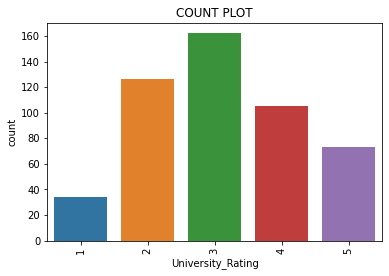

=======SOP===========
Describe Method
count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64



Value count Method
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64


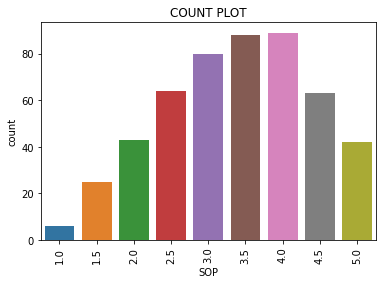

=======LOR===========
Describe Method
count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64



Value count Method
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64


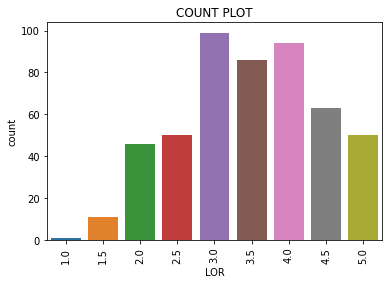

=======Research===========
Describe Method
count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64



Value count Method
1    280
0    220
Name: Research, dtype: int64


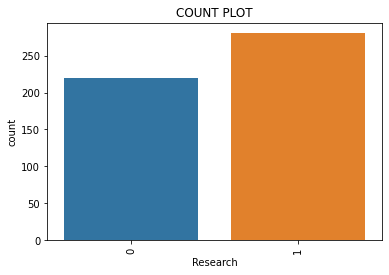

In [ ]:
for i in cat_col:
  print(f"======={ i }===========")
  univariateDiscrete(df, i)

<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'> University_Rating -  Max number of students[162] got rating 3

<font color='#0dab7f'> SOP - Max number of students[89] got SOP strength as 4

<font color='#0dab7f'> LOR - Max number of students[99] got LOR strength as 3

<font color='#0dab7f'> Research - Max number of students 280 got Research experience and 220 dont have research experience

##<font color='33A2FF'><b> **BIVARIATE ANALYSIS**

In [ ]:
# function for Continuous vs discrete BIVARIATE Analysis
def cont_discrete_bivarite(df, x_dis, y_con):
  plt.figure(figsize=(25,5))
  plt.subplot(1,3,1)
  plt.title("BOX PLOT")
  sns.boxplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,2)
  plt.title("VIOLIN PLOT")
  sns.violinplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,3)
  plt.title("BAR PLOT")
  sns.barplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
# function for discrete vs discrete BIVARIATE Analysis
def discrete_discrete_bivarite(df, x_dis, hue = None ):
  plt.figure(figsize=(15,5))
  plt.subplot(1,1,1)
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= x_dis, hue=hue)
  plt.show()

In [ ]:
# function for continuous vs continuous BIVARIATE Analysis
def cont_cont_bivarite(df, x_cont, y_cont ):
  plt.figure(figsize=(8,5))
  plt.subplot(1,1,1)
  plt.title("scatter PLOT")
  sns.scatterplot(x=df[x_cont], y=df[y_cont])
  plt.show()

======= University_Rating VS Chance_of_Admit ===========



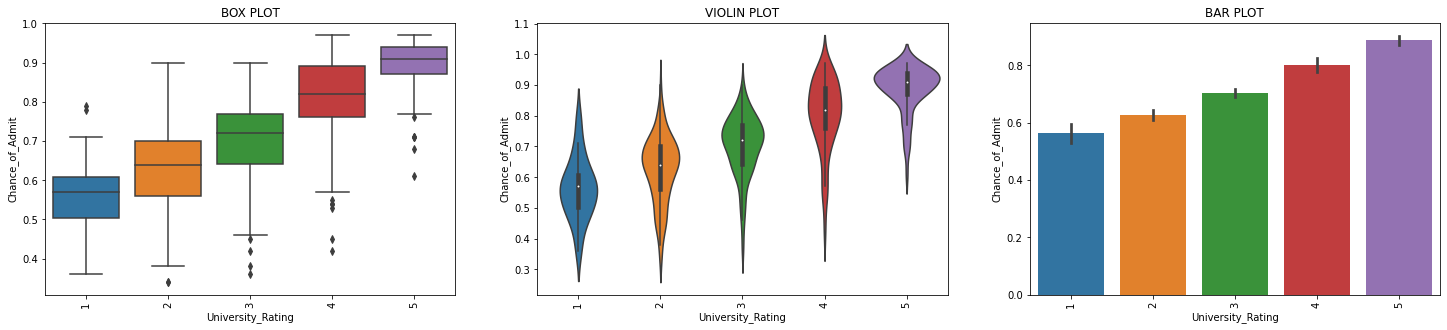

======= SOP VS Chance_of_Admit ===========



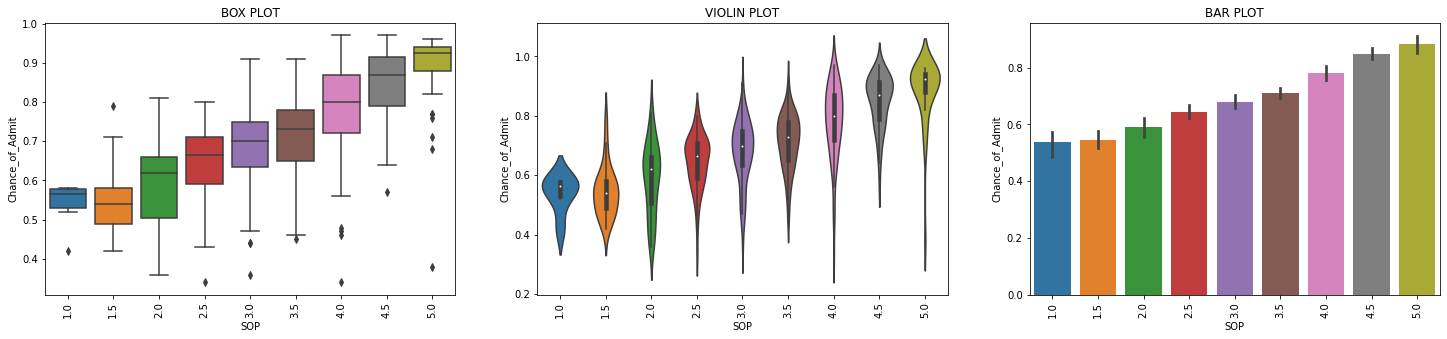

======= LOR VS Chance_of_Admit ===========



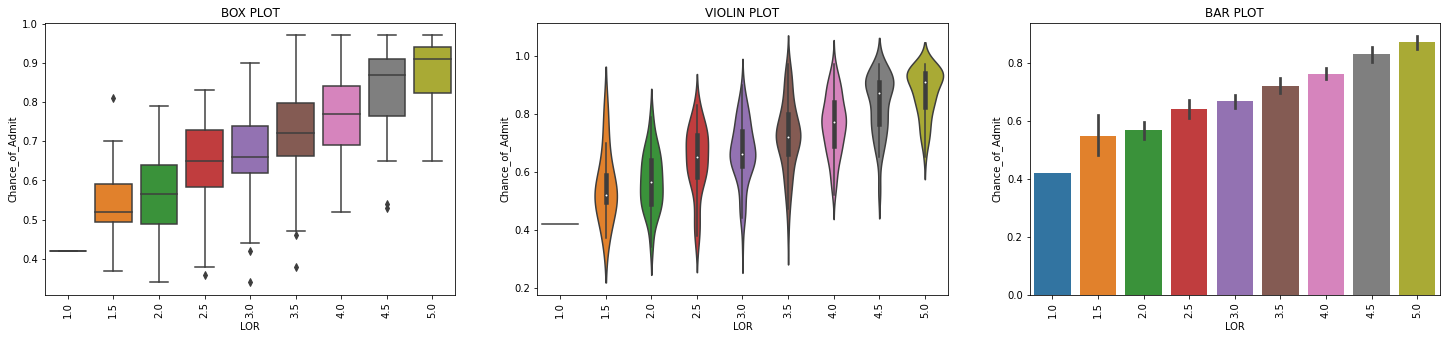

======= Research VS Chance_of_Admit ===========



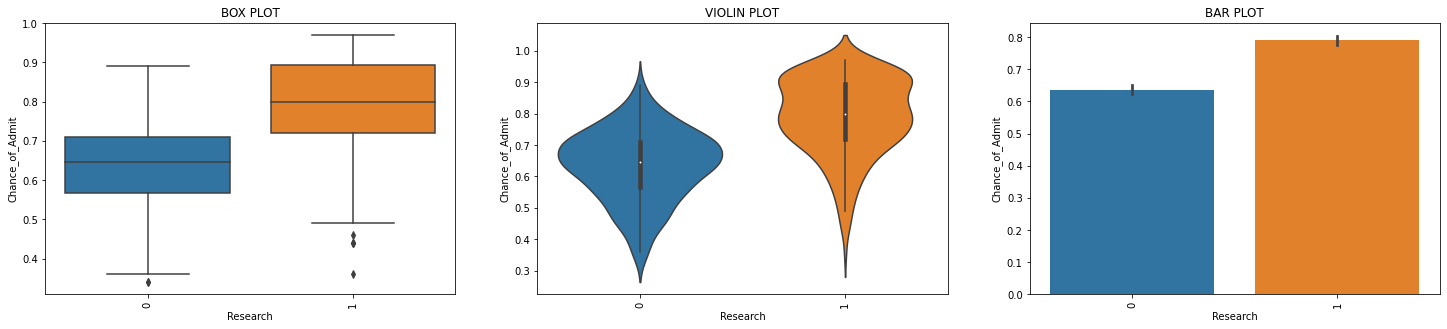

In [ ]:
for col in cat_col:
  print(f"======= { col } VS Chance_of_Admit ===========")
  print()
  cont_discrete_bivarite(df, col, 'Chance_of_Admit')

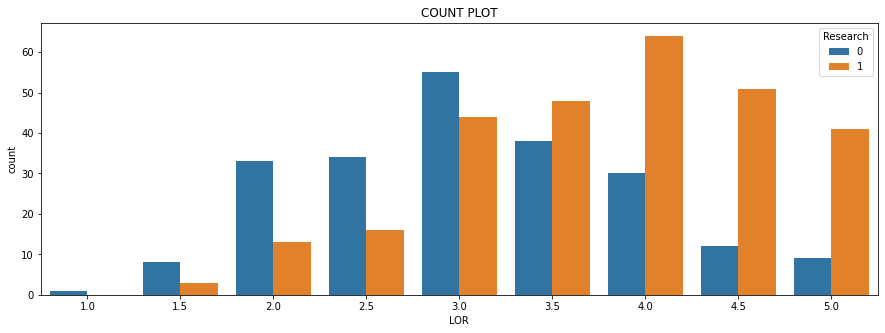

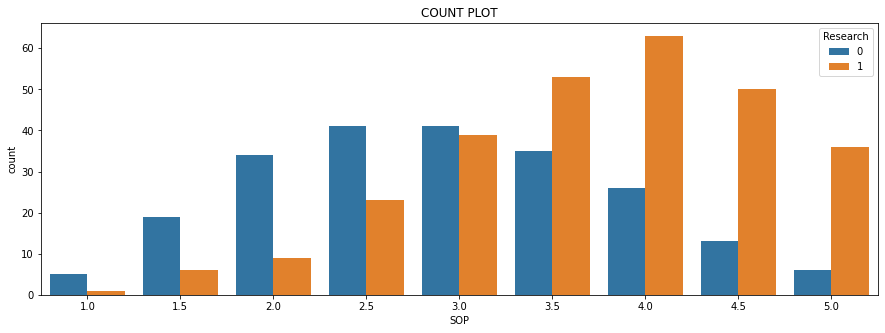

In [ ]:
discrete_discrete_bivarite(df, 'LOR', hue = 'Research' )
discrete_discrete_bivarite(df, 'SOP', hue = 'Research' )

<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'>University_Rating VS Chance_of_Admit : Chances of admit is more for students who have high rating


<font color='#0dab7f'>LOR VS Chance_of_Admit : Chances of admit is more for students who have more LOR strength

<font color='#0dab7f'>SOP VS Chance_of_Admit Chances of admit is more for students who have more SOP strength

<font color='#0dab7f'>Research VS Chance_of_Admit : Chances of admit is more for students who have research experience

<font color='#0dab7f'><b>Recommendation</b>:

<font color='#0dab7f'>Students with more research papers have more more chances of admission to top university ratings (4 and 5)

<font color='#0dab7f'> Students with higher ratings in statement of purpose and letter of recommendation are students with more research papers 

<font color='#0dab7f'> Students with higher scores in GRE , TOEFL and CGPA have published more papers.

=======GRE_Score===========



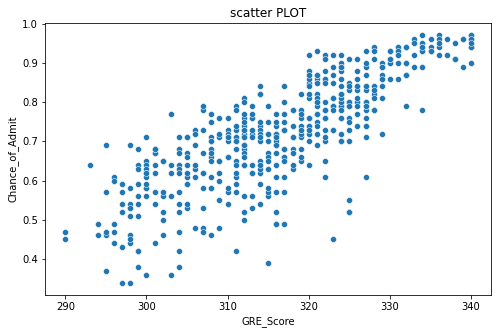

=======TOEFL_Score===========



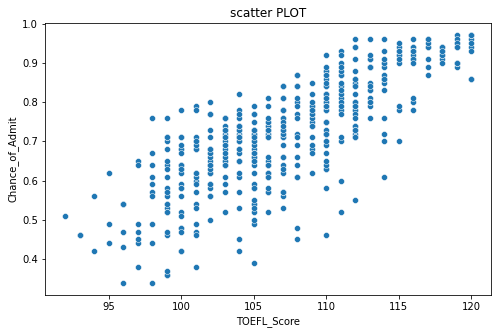

=======CGPA===========



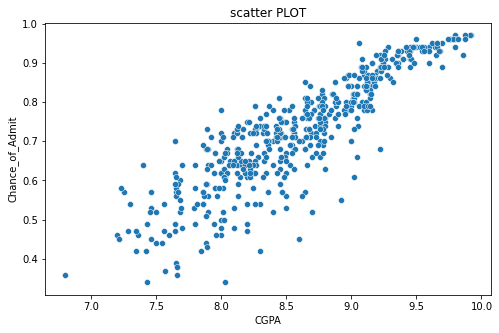

=======Chance_of_Admit===========



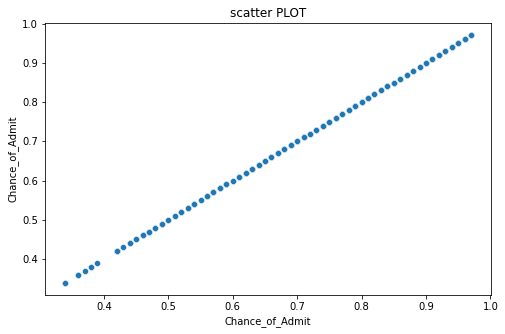

In [ ]:
for col in num_col:
  print(f"======={ col }===========")
  print()
  cont_cont_bivarite(df, col, 'Chance_of_Admit' )

<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'> GRE_Score , TOFEL_Score, CGPA shows positive correlations with target chances of admit.

**<font color='33A2FF'><b>CORRELATION MATRIX**

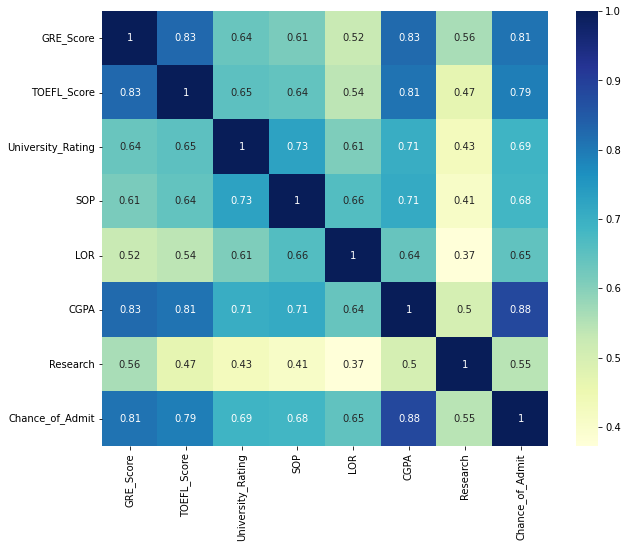

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'> 1) GRE_Score , TOFEL_Score, CGPA have high correlations with target chances of admit. so we can consider any one variable for target prediction

<font color='#0dab7f'> 2) All the input variables are positively correleted with target variable chances of admit.

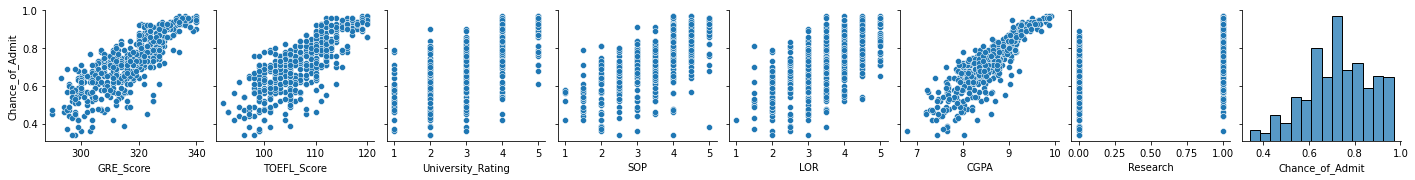

In [ ]:
sns.pairplot(df, y_vars=["Chance_of_Admit"]);

<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'> Above pairplot shows GRE_Score , TOFEL_Score, CGPA have high correlations with target chances of admit.

<font color='#0dab7f'><b>EDA Observations and Inferences: </b>

<font color='#0dab7f'> 1) GRE Score - Median score is 317 out of 340, Most number of students (24) scored 312 and Max score is 340

<font color='#0dab7f'> 2) TOEFL Score - Median score is 107 out of 120, Most number of students (44) scored 110 and Max score is 120

<font color='#0dab7f'> 3) CGPA - Median score is 8.56 out of 10, Most number of students (9) scored 8.76 and Max score is 9.92

<font color='#0dab7f'> 4) Chance of Admit - Median score is 0.72, Most number of students (23) scored 0.71 and Max score is 0.97

<font color='#0dab7f'> 5) University_Rating - Max number of students[162] got rating 3

<font color='#0dab7f'> 6) SOP - Max number of students[89] got SOP strength as 4. Chances of admit is more for students who have more SOP strength

<font color='#0dab7f'> 7) LOR - Max number of students[99] got LOR strength as 3.  Chances of admit is more for students who have more LOR strength

<font color='#0dab7f'> 8) Research - Max number of students 280 got Research experience and 220 dont have research experience. Chances of admit is more for students who have research experience

<font color='#0dab7f'> 9) GRE_Score , TOFEL_Score, CGPA have high correlations with target chances of admit. so we can consider any one variable for target prediction

<font color='#0dab7f'><b>EDA Recommendation: </b>

<font color='#0dab7f'> 1) Students with more research papers have more more chances of admission to top university ratings (4 and 5)

<font color='#0dab7f'>2) Students with higher ratings in statement of purpose and letter of recommendation are students with more research papers

<font color='#0dab7f'> 3) Students with higher scores in GRE , TOEFL and CGPA have published more research papers.

<font color='#0dab7f'> 4) Chances of admission is more for students having research papers and high CGPA scores.

**<font color='33A2FF'><b>Feature Engineering**

In [ ]:
df.head(5)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Dropping the target variable
# df_model = df.drop('Chance_of_admit', axis = 1, inplace = True)

In [ ]:
# Encoding - Not required because categorical columns University rating, SOP, LOR, Research are ordinal features 
# and are already having ordered numerical values 


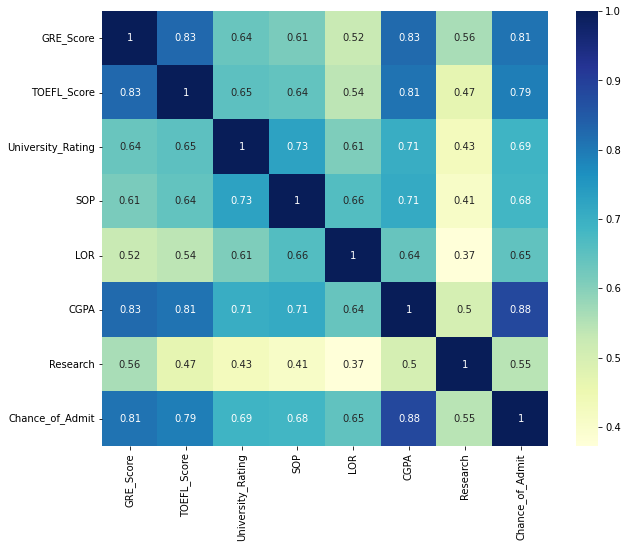

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<font color='#0dab7f'><b>Observations:</b> GRE_Score , TOFEL_Score, CGPA have high correlations with target chances of admit.

**<font color='33A2FF'><b>Model Building with Linear regression**

<font color='#0dab7f'><b>Assumptions of Linear regression:</b> 

<font color='#0dab7f'> 1) Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

<font color='#0dab7f'> 2) The mean of residuals is nearly zero 

<font color='#0dab7f'> 3) Linearity of variables (no pattern in the residual plot) 

<font color='#0dab7f'> 4) Test for Homoscedasticity

<font color='#0dab7f'> 5) Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

**<font color='33A2FF'><b> MODEL 1 using OLS stats method<b>**

In [ ]:
# Linear regression
from sklearn.model_selection import train_test_split
X = df.drop('Chance_of_Admit', axis = 1)
Y = df['Chance_of_Admit']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1) 


In [ ]:
# Standardisation

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_columns=X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X_train_columns)
X_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,-0.53736,-0.519491,-0.054636,-1.337783,0.009331,-0.326582,-1.111142
1,0.16364,0.449257,-1.802983,-0.845045,0.009331,-0.045935,0.899975
2,-1.41361,-1.003865,-0.054636,0.140430,-1.057098,-1.135504,-1.111142
3,-1.41361,-1.326781,-1.802983,-0.352308,-1.590312,-2.918435,0.899975
4,0.51414,-0.519491,-0.054636,0.140430,0.542546,0.449323,0.899975


In [ ]:
X_test_std= scaler.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) # col name same as train d
X_test.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,-0.274485,-0.196575,-0.928809,-0.845045,-1.590312,-0.227530,-1.111142
1,-0.362110,-0.035117,-0.054636,-0.352308,-0.523883,-0.178004,0.899975
2,2.003764,1.902379,1.693711,1.125906,0.542546,1.869065,-1.111142
3,-0.011610,-0.035117,-0.928809,0.140430,0.009331,0.119151,0.899975
4,0.777014,0.449257,0.819538,1.125906,0.542546,0.647427,0.899975


In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [ ]:
import statsmodels.api as sm
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using 'OLS'
lr = sm.OLS(Y_train.values, X_train_sm).fit()   #statsmodels.regression.linear_model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          2.10e-142
Time:                        16:14:57   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# dropping SOP because it has pvalue > 0.5
X_train_new=X_train.drop(columns='SOP')
X_train_new.head()

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research
0,-0.53736,-0.519491,-0.054636,0.009331,-0.326582,-1.111142
1,0.16364,0.449257,-1.802983,0.009331,-0.045935,0.899975
2,-1.41361,-1.003865,-0.054636,-1.057098,-1.135504,-1.111142
3,-1.41361,-1.326781,-1.802983,-1.590312,-2.918435,0.899975
4,0.51414,-0.519491,-0.054636,0.542546,0.449323,0.899975


In [ ]:
X_train_new_sm = sm.add_constant(X_train_new)
model1 = sm.OLS(Y_train.values, X_train_new_sm).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.1
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.38e-143
Time:                        16:14:57   Log-Likelihood:                 559.10
No. Observations:                 400   AIC:                            -1104.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Performance on test data

In [ ]:
X_test_sm = sm.add_constant(X_test)
X_test_del=list(set(X_test_sm.columns).difference(set(X_train_new_sm.columns)))
print(f'Dropping {X_test_del} from test set')

# Dropping ['SOP'] from test set
X_test_new=X_test_sm.drop(columns=X_test_del)

X_test_new.head()

Dropping ['SOP'] from test set


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research
0,1.0,-0.274485,-0.196575,-0.928809,-1.590312,-0.227530,-1.111142
1,1.0,-0.362110,-0.035117,-0.054636,-0.523883,-0.178004,0.899975
2,1.0,2.003764,1.902379,1.693711,0.542546,1.869065,-1.111142
3,1.0,-0.011610,-0.035117,-0.928809,0.009331,0.119151,0.899975
4,1.0,0.777014,0.449257,0.819538,0.542546,0.647427,0.899975


In [ ]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

pred.head()

0    0.653708
1    0.701058
2    0.944459
3    0.729969
4    0.815587
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('Mean Absolute Error ', mean_absolute_error(Y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(Y_test.values,pred) ))

Mean Absolute Error  0.040152798992043666
Root Mean Square Error  0.05871733986143245


<font color='#0dab7f'><b>Observations for model 1 using OLS stats method:</b> 

<font color='#0dab7f'>1. P value is less than 5% for GRE_Score, TOEFL_Score, LOR, CGPA, Research. Hence these independent variables are statistically significant.

<font color='#0dab7f'>2. P value is more than 5% for University rating and SOP hence they are not statistically significant

<font color='#0dab7f'>3. R squared is 0.82 and no significant drop in Adjusted R2 is 0.81 hence the model is performing good 

<font color='#0dab7f'>4. Based on weights, CGPA is very important feature


**<font color='33A2FF'><b> MODEL 2 using SK LEARN LINEAR REGRESSION<b>**

In [ ]:
# Another way of getting R2 score using sk learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
y_train_prd = model.predict(X_train)
y_test_prd = model.predict(X_test)

In [ ]:
print("Model coefficents : ",model.coef_)
print("Model intercepts : ",model.intercept_)

Model coefficents :  [0.02091007 0.01965792 0.00701103 0.00304937 0.01352815 0.07069295
 0.00988992]
Model intercepts :  0.7209250000000001


**<font color='33A2FF'><b>Model performance evaluation**

In [ ]:
# R2 score 
r2 = model.score(X_train, Y_train)
print("R2 score using sk learn : ",r2)

R2 score using sk learn :  0.8215099192361265


In [ ]:
# Adjusted R2 score
n = X_train.shape[0] 
d = X_train.shape[1]
Num = (1 - r2) * (n - 1)
den = (n - d - 1)
AdjR2 = 1 - (Num / den) 
print("Adjusted R2 score using sk learn : ", AdjR2.round(2))

Adjusted R2 score using sk learn :  0.82


In [ ]:
# MAE 
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(Y_train, y_train_prd)
mae = mean_absolute_error(Y_test, y_test_prd)
print("Test performance using Mean absolute error : ",mae)
print("Train performance using Mean absolute error : ",mae_train)

Test performance using Mean absolute error :  0.040200193804157944
Train performance using Mean absolute error :  0.04294488315548092


In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
mse_train = np.sqrt(mean_squared_error(Y_train, y_train_prd))
mse = np.sqrt(mean_squared_error(Y_test, y_test_prd))
print("Test performance using Mean squared error : ", mse)
print("Train performance using Mean squared error : ", mse_train)

Test performance using Mean squared error :  0.0588141045765077
Train performance using Mean squared error :  0.05977752557506849


**<font color='33A2FF'><b>Testing the assumptions of the linear regression model**

In [ ]:
# Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x_t = X_train
vif['features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

            features   VIF
0          GRE_Score  4.88
5               CGPA  4.75
1        TOEFL_Score  4.26
3                SOP  2.92
2  University_Rating  2.80
4                LOR  2.08
6           Research  1.51


<font color='#0dab7f'><b>Observations:</b> VIF for all the features are below 5. Multicollinearity does not exists

In [ ]:
# The mean of residuals is nearly zero 

residual = (Y_train - y_train_prd)
print(" mean of residuals : ", np.mean(residual).round(2))

 mean of residuals :  -0.0


<font color='#0dab7f'><b>Observations:</b> Mean of Residuals is near to zero (0.00) 

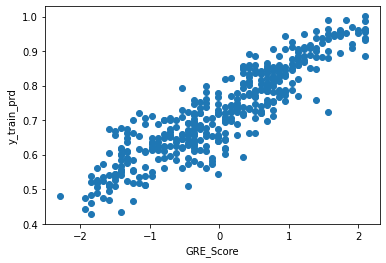

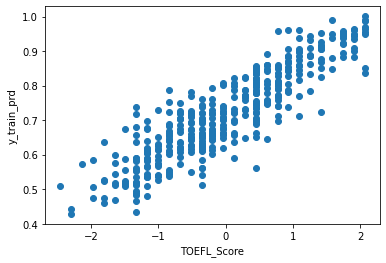

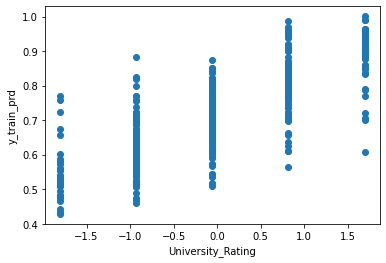

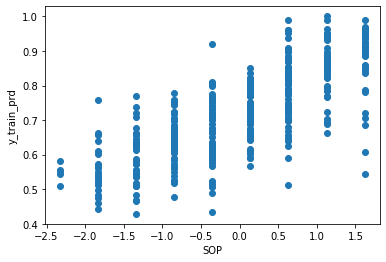

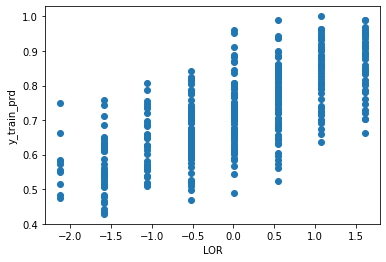

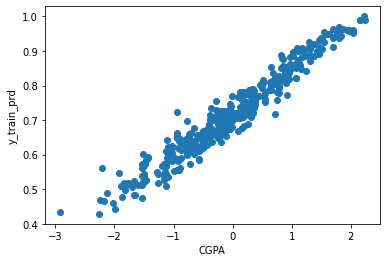

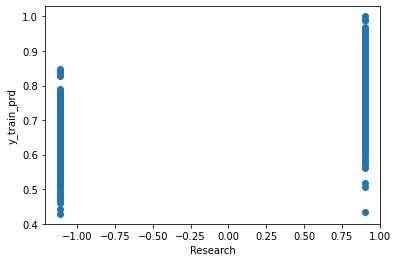

In [ ]:
# Linearity of variables (no pattern in the residual plot) 
for col in X_train.columns:
  fig = plt.figure()
  plt.scatter(X_train[col], y_train_prd)
  plt.xlabel(col) 
  plt.ylabel("y_train_prd")
  plt.show()

<font color='#0dab7f'><b>Observations:</b> CGPA, TOEFL , GRE score linearly distributed when compared with Target variable.  Linearity pattern in not clear for other input variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

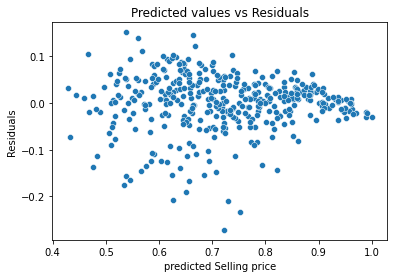

In [ ]:
# Test for Homoscedasticity

sns.scatterplot(y_train_prd,residual)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.plot()


<font color='#0dab7f'><b>Observations:</b> No pattern for hetroscedasticity

Text(0.5, 1.0, 'Histogram of residuals')

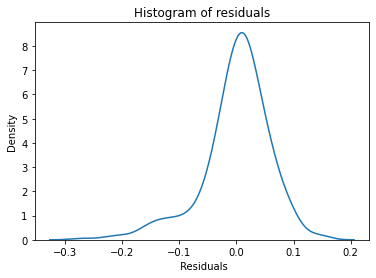

In [ ]:
# Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

sns.kdeplot(residual)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

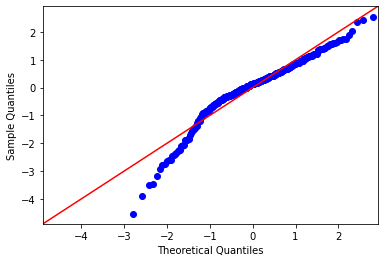

In [ ]:
# qq plot
import statsmodels.api as sm
fig = sm.qqplot(residual, line='45' , fit=True)
plt.show()

<font color='#0dab7f'><b>Observations:</b> Bell shape curve in residual distribution. Hence residuals are normally distributed.

<font color='#0dab7f'><b>Observations for model 2 using SK LEARN LINEAR REGRESSION:</b> 

<font color='#0dab7f'>1. R squared is 0.82 and no significant drop in Adjusted R2(0.81) hence the model is performing good 

<font color='#0dab7f'>2. Based on weights, CGPA is very important feature

<font color='#0dab7f'>3. VIF for all the features are below 5. Multicollinearity does not exists

<font color='#0dab7f'>4. Mean of Residuals is near to zero (0.00)

<font color='#0dab7f'>5. CGPA, TOEFL , GRE score linearly distributed when compared with Target variable. Linearity pattern in not clear for other input variables

<font color='#0dab7f'>6. No pattern for hetroscedasticity 

<font color='#0dab7f'>7. Bell shape curve in residual distribution. Hence residuals are normally distributed.

<font color='#0dab7f'>8. RMSE and MAE are low in Train and Test data

**<font color='33A2FF'><b> MODEL 3 using SK LEARN LINEAR REGRESSION + LASSO<b>**

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def model_performance( model, X_train, Y_train, Y_train_prd, Y_test, Y_test_prd):
  # R2 score
  r2 = model.score(X_train, Y_train)
  print("r2 score : ", r2)
  # Adjusted R2 score
  n = X_train.shape[0] 
  d = X_train.shape[1]
  Num = (1 - r2) * (n - 1)
  Den = (n - d - 1)
  AdjR2 = 1 - (Num / Den) 
  print("Adjusted R2 score: ", AdjR2.round(2))
  print("Model coefficents : ", model.coef_)
  print("Model intercepts : ", model.intercept_)
  # MAE 
  mae_train = mean_absolute_error(Y_train, Y_train_prd)
  mae = mean_absolute_error(Y_test, Y_test_prd)
  print("Test performance - Mean absolute error : ",mae)
  print("Train performance - Mean absolute error : ",mae_train)
  # RMSE
  mse_train = np.sqrt(mean_squared_error(Y_train, Y_train_prd))
  mse = np.sqrt(mean_squared_error(Y_test, Y_test_prd))
  print("Test performance - Mean squared error : ", mse)
  print("Train performance - Mean squared error : ", mse_train)


In [ ]:
from sklearn import linear_model
def best_alpha(alpha, X_train, Y_train, X_test):
  model = linear_model.Lasso(alpha)
  model.fit(X_train, Y_train)
  Y_train_prd = model.predict(X_train)
  Y_test_prd = model.predict(X_test)
  # R2 score 
  r2 = model.score(X_train, Y_train)
  # Adjusted R2 score
  n = X_train.shape[0] 
  d = X_train.shape[1]
  Num = (1 - r2) * (n - 1)
  Den = (n - d - 1)
  AdjR2 = 1 - (Num / Den) 
  return r2, AdjR2.round(2)


In [ ]:
r2 = []
adjR2 = []
values = [0.001, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in values:
  r2_1, adjR2_1 = best_alpha(i, X_train, Y_train, X_test)
  r2.append(r2_1) 
  adjR2.append(adjR2_1)
print(r2)
print(adjR2)

[0.8214280932146112, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.82, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02]


<font color='#0dab7f'> R2 and AdjR2 both are high when alpha = 0.001. Hence we design the Lasso model with Alpha = 0.001

In [ ]:
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha=0.001)
model_lasso.fit(X_train, Y_train)
Y_train_prd = model_lasso.predict(X_train)
Y_test_prd = model_lasso.predict(X_test)

In [ ]:
model_performance( model_lasso, X_train, Y_train, Y_train_prd, Y_test, Y_test_prd)

r2 score :  0.8214280932146112
Adjusted R2 score:  0.82
Model coefficents :  [0.02083678 0.01939664 0.00682895 0.00282441 0.01307679 0.07084238
 0.00929901]
Model intercepts :  0.7209250000000001
Test performance - Mean absolute error :  0.040225003588944166
Train performance - Mean absolute error :  0.0429606559607491
Test performance - Mean squared error :  0.05897939453513452
Train performance - Mean squared error :  0.05979122604685265


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
def assumptions(X_train, Y_train, Y_train_prd ):
  print('\033[95m' + "Testing Assumptions" + '\033[0m')
  print()
  print( '\033[95m' + "1. Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)" + '\033[0m' )
  vif = pd.DataFrame()
  x_t = X_train
  vif['features'] = x_t.columns
  vif['VIF'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)
  print()
  # The mean of residuals is nearly zero 
  print('\033[95m' + "2. The mean of residuals is nearly zero " + '\033[0m' )
  residual = (Y_train - Y_train_prd)
  print(" mean of residuals : ", np.mean(residual).round(2))
  print()
  # Linearity of variables (no pattern in the residual plot)
  print('\033[95m' + "3. Linearity of variables (no pattern in the residual plot) " + '\033[0m')
  for col in X_train.columns:
    fig = plt.figure()
    plt.scatter(X_train[col], Y_train_prd)
    plt.xlabel(col) 
    plt.ylabel("y_train_prd")
    plt.show()
  print()
  # Test for Homoscedasticity
  print('\033[95m' + "4. Test for Homoscedasticity" + '\033[0m')
  fig = plt.figure()
  plt.scatter(Y_train_prd, residual)
  plt.xlabel("predicted Selling price")
  plt.ylabel("Residuals")
  plt.title("Predicted values vs Residuals")
  plt.show()
  print()
  # Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)
  print('\033[95m' + "5. Normality of residuals " + '\033[0m')
  fig = plt.figure()
  sns.kdeplot(residual)
  plt.xlabel(" Residuals")
  plt.title("Histogram of residuals")
  # qq plot
  fig = plt.figure()
  sm.qqplot(residual, line='45' , fit=True)
  plt.show()

Testing Assumptions

1. Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
            features   VIF
0          GRE_Score  4.88
5               CGPA  4.75
1        TOEFL_Score  4.26
3                SOP  2.92
2  University_Rating  2.80
4                LOR  2.08
6           Research  1.51

2. The mean of residuals is nearly zero 
 mean of residuals :  -0.0

3. Linearity of variables (no pattern in the residual plot) 


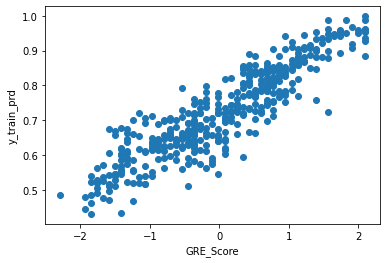

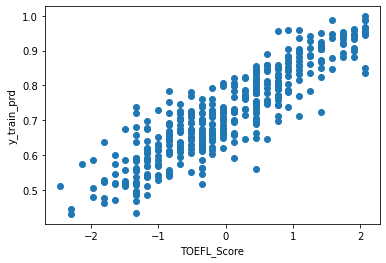

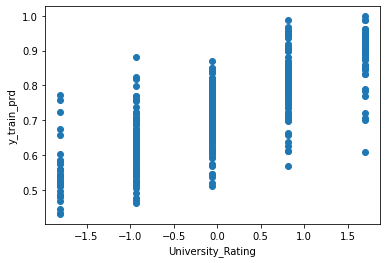

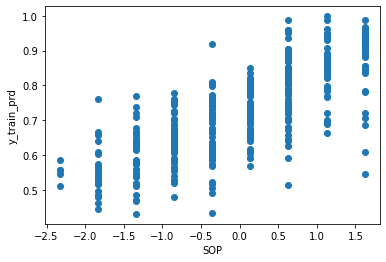

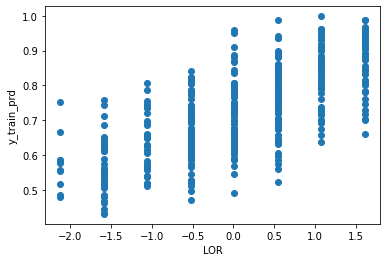

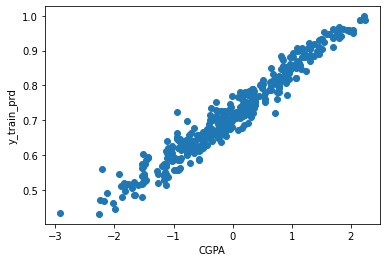

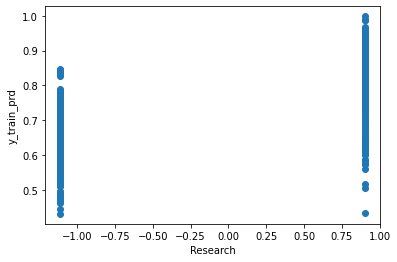


4. Test for Homoscedasticity


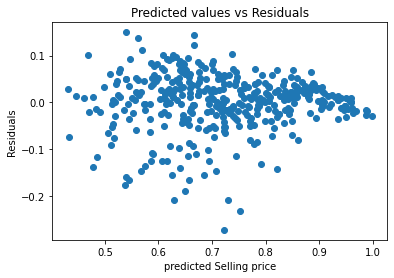


5. Normality of residuals 


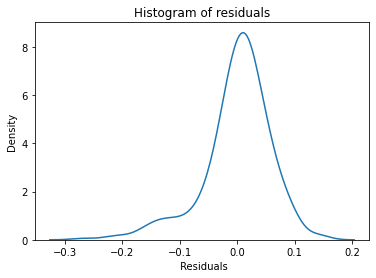

<Figure size 432x288 with 0 Axes>

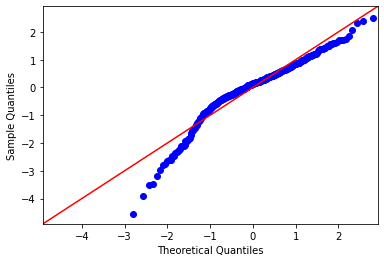

In [ ]:
assumptions(X_train, Y_train, Y_train_prd )

<font color='#0dab7f'><b>Observations for model 3 SK LEARN LINEAR REGRESSION + LASSO:</b> 

<font color='#0dab7f'>1. R squared is 0.82 and no significant drop in Adjusted R2 (0.82) hence the model is performing good 

<font color='#0dab7f'>2. Based on weights, CGPA is very important feature

<font color='#0dab7f'>3. VIF for all the features are below 5. Multicollinearity does not exists

<font color='#0dab7f'>4. Mean of Residuals is near to zero (0.00)

<font color='#0dab7f'>5. CGPA, TOEFL , GRE score linearly distributed when compared with Target variable. Linearity pattern in not clear for other input variables

<font color='#0dab7f'>6. No pattern for hetroscedasticity 

<font color='#0dab7f'>7. Bell shape curve in residual distribution. Hence residuals are normally distributed.

<font color='#0dab7f'>8. RMSE and MAE are low in Train and Test data

**<font color='33A2FF'><b> MODEL 4 using SK LEARN LINEAR REGRESSION + RIDGE<b>**

In [ ]:
from sklearn import linear_model
def best_alpha(alpha, X_train, Y_train, X_test):
  model = linear_model.Ridge(alpha)
  model.fit(X_train, Y_train)
  Y_train_prd = model.predict(X_train)
  Y_test_prd = model.predict(X_test)
  # R2 score 
  r2 = model.score(X_train, Y_train)
  # Adjusted R2 score
  n = X_train.shape[0] 
  d = X_train.shape[1]
  Num = (1 - r2) * (n - 1)
  Den = (n - d - 1)
  AdjR2 = 1 - (Num / Den) 
  return r2, AdjR2.round(2)

In [ ]:
r2 = []
adjR2 = []
values = [0.001, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in values:
  r2_1, adjR2_1 = best_alpha(i, X_train, Y_train, X_test)
  r2.append(r2_1) 
  adjR2.append(adjR2_1)
print(r2)
print(adjR2)

[0.8215099192314496, 0.8215097331714656, 0.8215095017260566, 0.8215091790054141, 0.8215087657512017, 0.8215082626984069, 0.8215076705754102, 0.821506990104052, 0.8215062219997011, 0.8215053669713202]
[0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82]


<font color='#0dab7f'> R2 and AdjR2 both are high when alpha = 0.001. Hence we design the Ridge model with Alpha = 0.001

In [ ]:
from sklearn import linear_model
model_Ridge = linear_model.Ridge(alpha=0.001)
model_Ridge.fit(X_train, Y_train)
Y_train_prd = model_Ridge.predict(X_train)
Y_test_prd = model_Ridge.predict(X_test)

In [ ]:
model_performance( model_Ridge, X_train, Y_train, Y_train_prd, Y_test, Y_test_prd)

r2 score :  0.8215099192314496
Adjusted R2 score:  0.82
Model coefficents :  [0.02091027 0.01965804 0.00701111 0.00304952 0.01352819 0.0706923
 0.00988993]
Model intercepts :  0.7209250000000001
Test performance - Mean absolute error :  0.04020022231763803
Train performance - Mean absolute error :  0.04294486964892755
Test performance - Mean squared error :  0.058814121170720525
Train performance - Mean squared error :  0.059777525575851656


Testing Assumptions

1. Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
            features   VIF
0          GRE_Score  4.88
5               CGPA  4.75
1        TOEFL_Score  4.26
3                SOP  2.92
2  University_Rating  2.80
4                LOR  2.08
6           Research  1.51

2. The mean of residuals is nearly zero 
 mean of residuals :  -0.0

3. Linearity of variables (no pattern in the residual plot) 


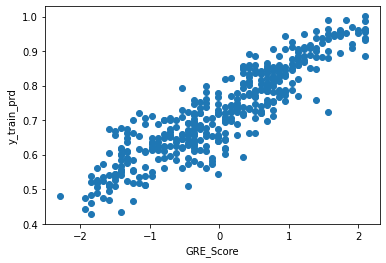

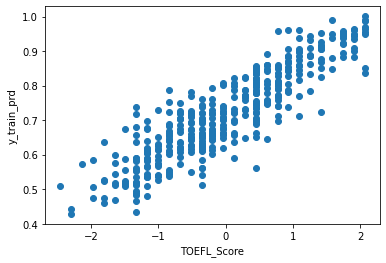

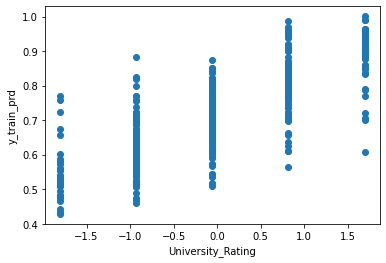

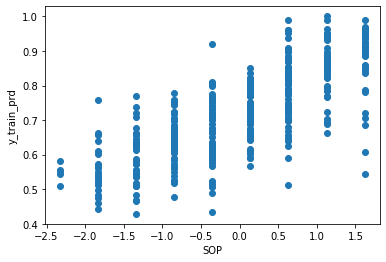

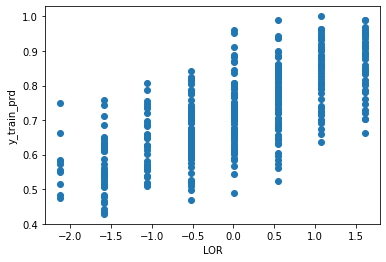

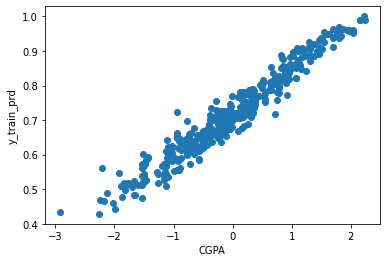

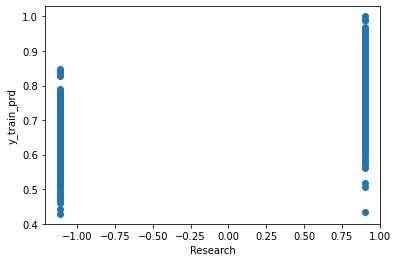


4. Test for Homoscedasticity


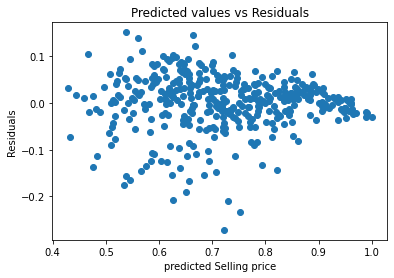


5. Normality of residuals 


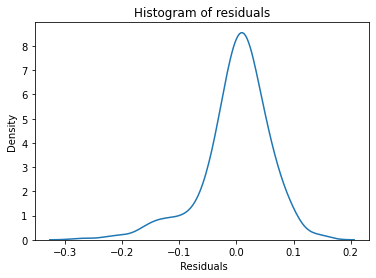

<Figure size 432x288 with 0 Axes>

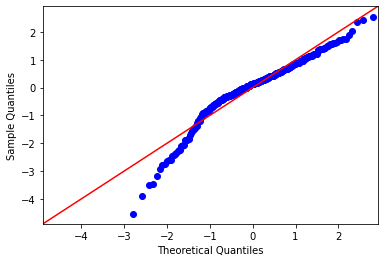

In [ ]:
assumptions(X_train, Y_train, Y_train_prd )

<font color='#0dab7f'><b>Observations for model 4 using SK LEARN LINEAR REGRESSION + RIDGE</b> 

<font color='#0dab7f'>1. R squared is 0.82 and no significant drop in Adjusted R2 (0.82) hence the model is performing good 

<font color='#0dab7f'>2. Based on weights, CGPA is very important feature

<font color='#0dab7f'>3. VIF for all the features are below 5. Multicollinearity does not exists

<font color='#0dab7f'>4. Mean of Residuals is near to zero (0.00)

<font color='#0dab7f'>5. CGPA, TOEFL , GRE score linearly distributed when compared with Target variable. Linearity pattern in not clear for other input variables

<font color='#0dab7f'>6. No pattern for hetroscedasticity 

<font color='#0dab7f'>7. Bell shape curve in residual distribution. Hence residuals are normally distributed.

<font color='#0dab7f'>8. RMSE and MAE are low in Train and Test data

**<font color='33A2FF'><b> MODEL 5 using SK LEARN LINEAR REGRESSION + ELASTIC NET<b>**

In [ ]:
from sklearn import linear_model
def best_alpha(alpha, X_train, Y_train, X_test):
  model = linear_model.ElasticNet(l1_ratio = alpha)
  model.fit(X_train, Y_train)
  Y_train_prd = model.predict(X_train)
  Y_test_prd = model.predict(X_test)
  # R2 score 
  r2 = model.score(X_train, Y_train)
  # Adjusted R2 score
  n = X_train.shape[0] 
  d = X_train.shape[1]
  Num = (1 - r2) * (n - 1)
  Den = (n - d - 1)
  AdjR2 = 1 - (Num / Den) 
  return r2, AdjR2.round(2)

In [ ]:
r2 = []
adjR2 = []
values = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in values:
  r2_1, adjR2_1 = best_alpha(i, X_train, Y_train, X_test)
  r2.append(r2_1) 
  adjR2.append(adjR2_1)
print(r2)
print(adjR2)

[0.7746013580270916, 0.17595322553647585, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.77, 0.16, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02]


<font color='#0dab7f'> R2 and AdjR2 both are high when l1 ratio = 0.001. Hence we design the Elastic net model with l1 ratio = 0.001

In [ ]:
from sklearn import linear_model
model_ElasticNet = linear_model.ElasticNet(l1_ratio=0.001)
model_ElasticNet.fit(X_train, Y_train)
Y_train_prd = model_ElasticNet.predict(X_train)
Y_test_prd = model_ElasticNet.predict(X_test)

In [ ]:
model_performance( model_ElasticNet, X_train, Y_train, Y_train_prd, Y_test, Y_test_prd)

r2 score :  0.7746013580270916
Adjusted R2 score:  0.77
Model coefficents :  [0.02169038 0.02069607 0.01363359 0.01278792 0.01387673 0.0278081
 0.01140507]
Model intercepts :  0.720925
Test performance - Mean absolute error :  0.0498467184886196
Train performance - Mean absolute error :  0.05009206483150416
Test performance - Mean squared error :  0.0680078469849973
Train performance - Mean squared error :  0.06717482418708715


Testing Assumptions

1. Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
            features   VIF
0          GRE_Score  4.88
5               CGPA  4.75
1        TOEFL_Score  4.26
3                SOP  2.92
2  University_Rating  2.80
4                LOR  2.08
6           Research  1.51

2. The mean of residuals is nearly zero 
 mean of residuals :  -0.0

3. Linearity of variables (no pattern in the residual plot) 


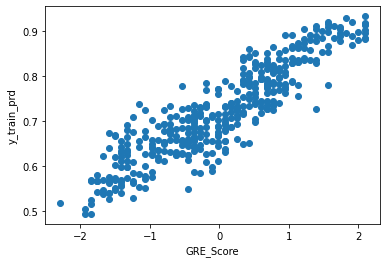

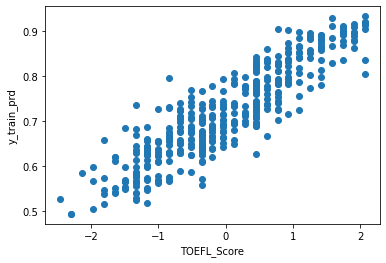

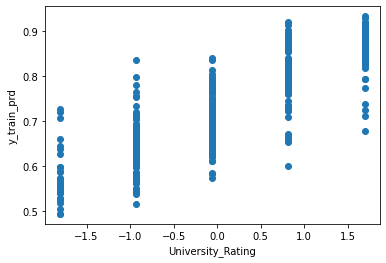

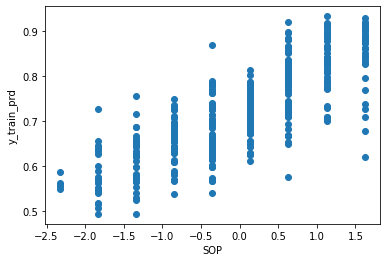

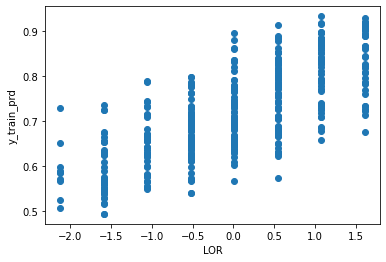

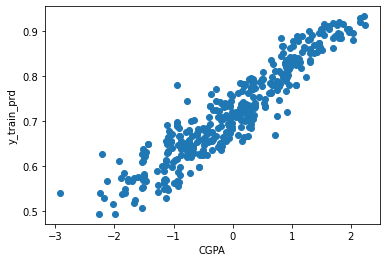

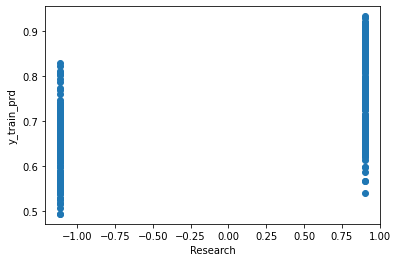


4. Test for Homoscedasticity


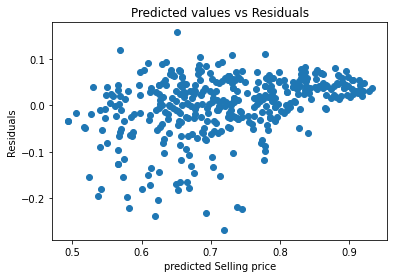


5. Normality of residuals 


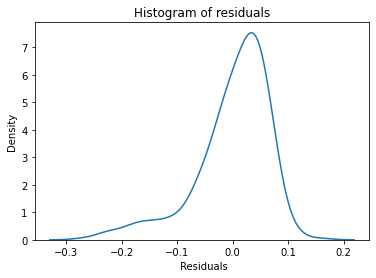

<Figure size 432x288 with 0 Axes>

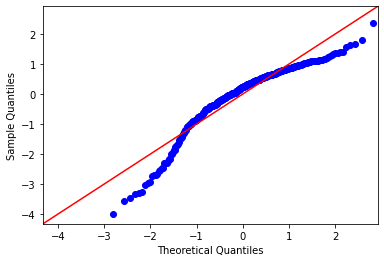

In [ ]:
assumptions(X_train, Y_train, Y_train_prd )

<font color='#0dab7f'><b>Observations for model 5 using SK LEARN LINEAR REGRESSION + ELASTIC NET</b> 

<font color='#0dab7f'>1. R squared is 0.77 and no significant drop in Adjusted R2 (0.77) hence the model is performing good 

<font color='#0dab7f'>2. Based on weights, CGPA is very important feature

<font color='#0dab7f'>3. VIF for all the features are below 5. Multicollinearity does not exists

<font color='#0dab7f'>4. Mean of Residuals is near to zero (0.00)

<font color='#0dab7f'>5. CGPA, TOEFL , GRE score linearly distributed when compared with Target variable. Linearity pattern in not clear for other input variables

<font color='#0dab7f'>6. No pattern for hetroscedasticity 

<font color='#0dab7f'>7. Bell shape curve in residual distribution. Hence residuals are normally distributed.

<font color='#0dab7f'>8. RMSE and MAE are low in Train and Test data

**<font color='33A2FF'><b> MODEL 6 using POLYNOMIAL FEATURES <b>**

Degree :  0 Maximum of Scores :  0.8238136131135446


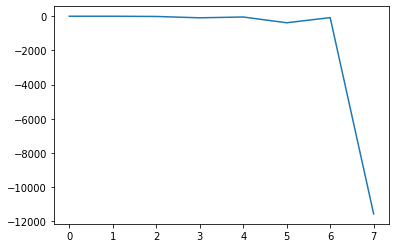

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
scores = []
for i in range(2, 10):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly, Y_train)
    x_test_p = poly.fit_transform(X_test)
    output = model.predict(X_poly)
    scores.append(model.score(x_test_p, Y_test))


max_idx = np.argmax(scores)
print("Degree : ", max_idx,  "Maximum of Scores : " , scores[max_idx])
plt.plot(scores)
plt.show()

<font color='#0dab7f'><b>Observation: </b>  Degree 0 - linear model is giving good performance with R2 score 0.82 

<font color='#0dab7f'><b>Actionable Insights & Recommendations: </b> 

<font color='#0dab7f'> 1) Most important feature for graduate admissions is CGPA. Next important feature is TOEFL and GRE score. 

<font color='#0dab7f'> 2) GRE_Score , TOFEL_Score, CGPA have high correlations with target chances of admit. so we can consider any one variable for target prediction

<font color='#0dab7f'> 3) Students with more research papers have more more chances of admission to top university ratings (4 and 5)

<font color='#0dab7f'>4) Students with higher ratings in statement of purpose and letter of recommendation are students with more research papers

<font color='#0dab7f'> 5) Students with higher scores in GRE , TOEFL and CGPA have published more research papers.

<font color='#0dab7f'> 6) Chances of admission is more for students having research papers and high CGPA scores.

<font color='#0dab7f'> 7) R2 is 0.82 for Linear regression(model 2), Lasso (model 3 with alpha 0.001 ) and Ridge (model 4 with alpha 0.001 ) and there is no drop in adjusted R2 so we can use any of these models for prediction 